# 0. Import Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
X = df.drop(['Churn', 'Customer ID'], axis=1)

In [4]:
X =  pd.get_dummies(X, drop_first=True).replace({False: 0, True: 1})
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [6]:
y_train.head()

632     0
3211    0
6318    1
1632    1
2150    0
Name: Churn, dtype: int64

# 1. Import Dependencies

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

2023-10-11 19:57:51.921804: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 19:57:51.947800: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-11 19:57:51.947833: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-11 19:57:51.947861: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-11 19:57:51.952727: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 19:57:51.953473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

# 2. Build and Compile Model

In [8]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

# 3. Fit, Predict and Evaluate

In [20]:
model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200


2023-10-11 19:24:05.296191: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 295679720 exceeds 10% of free system memory.


177/177 [==============================] - 1s 3ms/step - loss: 0.4337 - accuracy: 0.7918
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7924
Epoch 3/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7922
Epoch 4/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.7906
Epoch 5/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7947
Epoch 6/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.7918
Epoch 7/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7913
Epoch 8/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7936
Epoch 9/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.7894
Epoch 10/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7918
E

In [11]:
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

45/45 [==============================] - 0s 1ms/step


2023-10-11 19:09:50.141031: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73933048 exceeds 10% of free system memory.


In [16]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat)

0.6388140161725067

In [12]:
accuracy_score(y_test, y_hat)


0.8097941802696949

# 4. Saving and Reloading

In [13]:
model.save('tfmodel')

INFO:tensorflow:Assets written to: tfmodel/assets


INFO:tensorflow:Assets written to: tfmodel/assets


In [14]:
del model 

In [15]:
model = load_model('tfmodel')

## 5. Tensorflow Documentation Example
https://www.tensorflow.org/guide/basics

In [10]:
import tensorflow as tf

In [11]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


In [12]:
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


In [13]:
x+x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [14]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [15]:
y = tf.constant([[1., 1., 1.],
                 [1.,1.,1.]])

In [16]:
y@tf.transpose(y)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3., 3.],
       [3., 3.]], dtype=float32)>

In [17]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [18]:
x = tf.Variable(1.0)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>

In [19]:
def f(x):
    y = x**2 + 2*x + 4
    return y
print(f(x))

tf.Tensor(7.0, shape=(), dtype=float32)


In [20]:
with tf.GradientTape() as tape:
  y = f(x)
  

g_x = tape.gradient(y, x)  # g(x) = dy/dx
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [21]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

In [22]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [23]:
x = tf.constant([10, 9, 8])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [24]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

In [26]:
class MyModule(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)
    @tf.function 
    def multiply(self, x):
        return x*self.weight        

In [27]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [ ]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

In [ ]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

In [28]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]


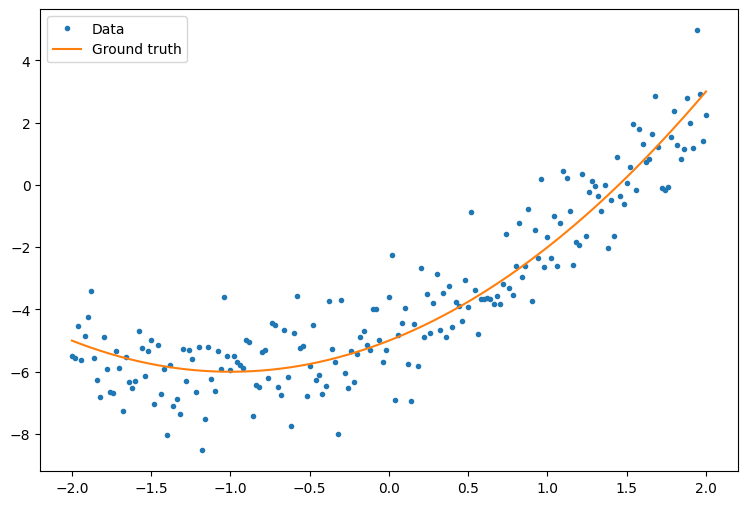

In [29]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [31]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

First, observe your model's performance before training:

In [32]:
quad_model = Model()

In [33]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

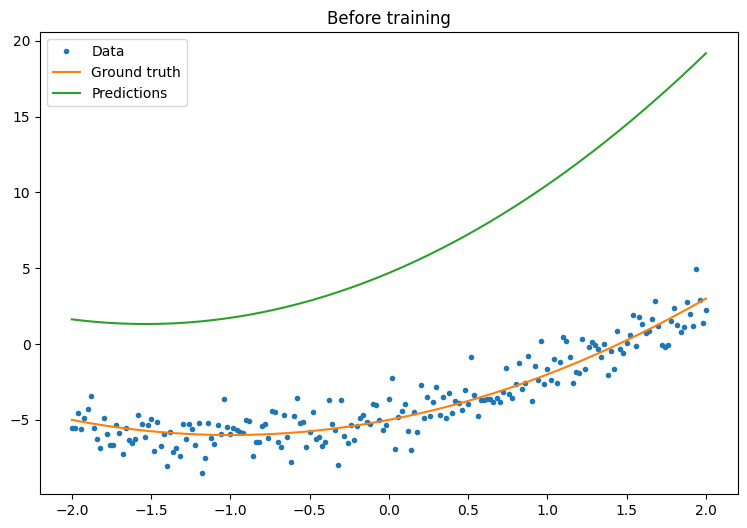

In [34]:
plot_preds(x, y, f, quad_model, 'Before training')

In [35]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [36]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 54.063
Mean squared error for step 10: 9.314
Mean squared error for step 20: 3.871
Mean squared error for step 30: 2.013
Mean squared error for step 40: 1.361
Mean squared error for step 50: 1.136
Mean squared error for step 60: 1.054
Mean squared error for step 70: 1.027
Mean squared error for step 80: 1.016
Mean squared error for step 90: 1.012




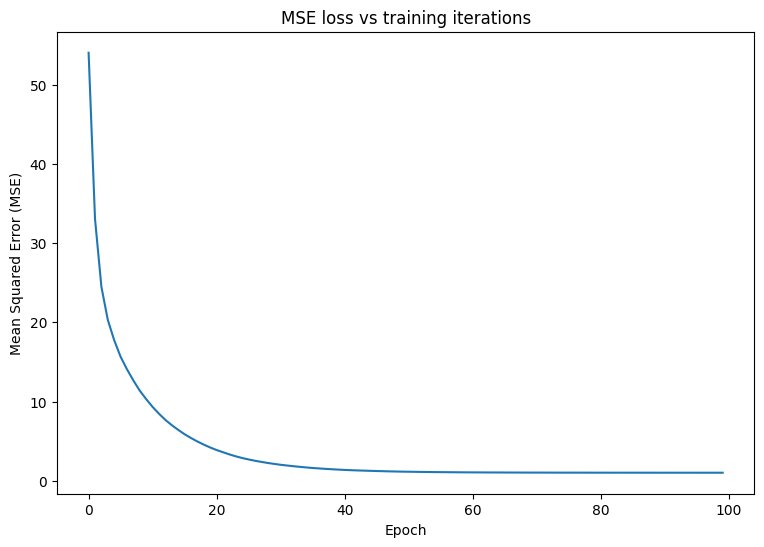

In [37]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

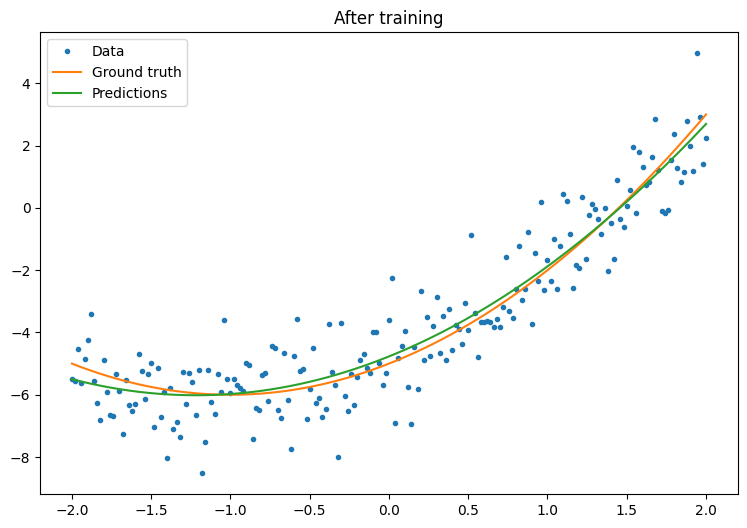

In [38]:
plot_preds(x, y, f, quad_model, 'After training')

That's working, but remember that implementations of common training utilities are available in the tf.keras module. So, consider using those before writing your own. To start with, the Model.compile and Model.fit methods implement a training loop for you:

Begin by creating a Sequential Model in Keras using tf.keras.Sequential. One of the simplest Keras layers is the dense layer, which can be instantiated with tf.keras.layers.Dense. The dense layer is able to learn multidimensional linear relationships of the form ...
. In order to learn a nonlinear equation of the form ..., 
, the dense layer's input should be a data matrix with ...
 and ...
 as features. The lambda layer, tf.keras.layers.Lambda, can be used to perform this stacking transformation.

In [39]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [40]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('./my_new_model')

INFO:tensorflow:Assets written to: ./my_new_model/assets


INFO:tensorflow:Assets written to: ./my_new_model/assets
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(


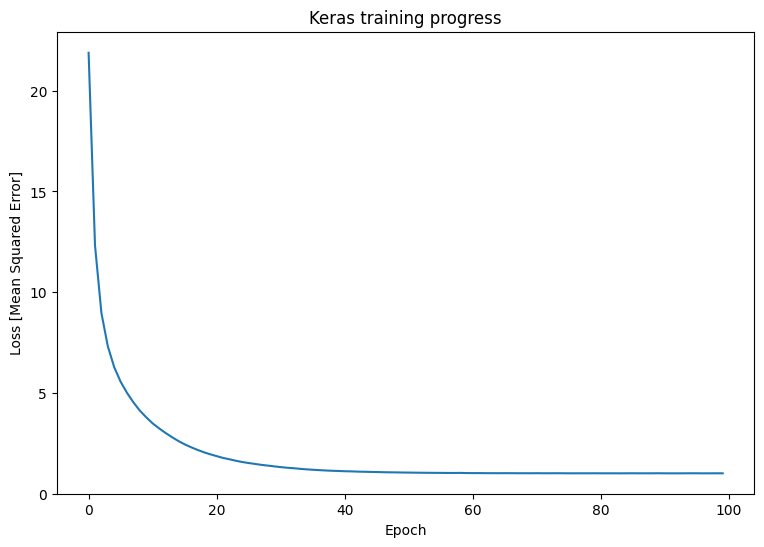

In [41]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

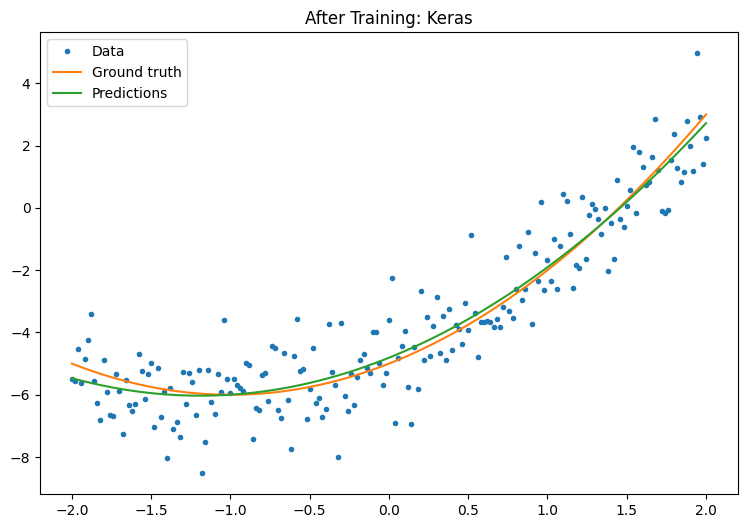

In [42]:
plot_preds(x, y, f, new_model, 'After Training: Keras')